In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# Function to remove outlier from y 
def remove_outliers_from_y(points,threshold):
    points['predict'] = points.y.rolling(window=5,center=True).mean()
    points['resid'] = abs(points.y - points.predict)   
    outlier_mask = points['resid'] > threshold
    points.loc[outlier_mask, 'y'] = np.nan
    print(f'Number of points :{points.y.isna().sum()}')
    points['y'] = points['y'].ffill()
    points['y'] = points['y'].bfill()
    points.drop(columns={'resid','predict'},axis=1,inplace=True)
    return points, outlier_mask

# Allow to plot outliers 
def plot_outliers(ax,type, id_profil,points):
    ax.set_title(f'Type {type} : {id_profil}')
    ax.set_xlabel('Value of x')
    ax.set_ylabel('Value of y')
    ax.plot(points.x, points.y, marker='o')
    # ax.plot(points.loc[mask, 'x'], points.loc[mask, 'y'], marker='x', color='red')
    
# Load and prepare the points to be used
def load_profil(type,id_profil): 
    points = pd.read_csv(f"C:\\Users\\onerf\\Documents\\UMons\\Master2\\Stage\\ballast\\ballast-toolbox\\src\\main\\resources\\template-export\\dump\\{type}\\{id_profil}.csv", names=['x', 'y'])
    sorted_points = points.sort_values(by='x')
    # sorted_points = sorted_points[(sorted_points.x >= -470) & (sorted_points.x <= 470)]
    return sorted_points

Number of points :59


TypeError: plot_outliers() takes 4 positional arguments but 5 were given

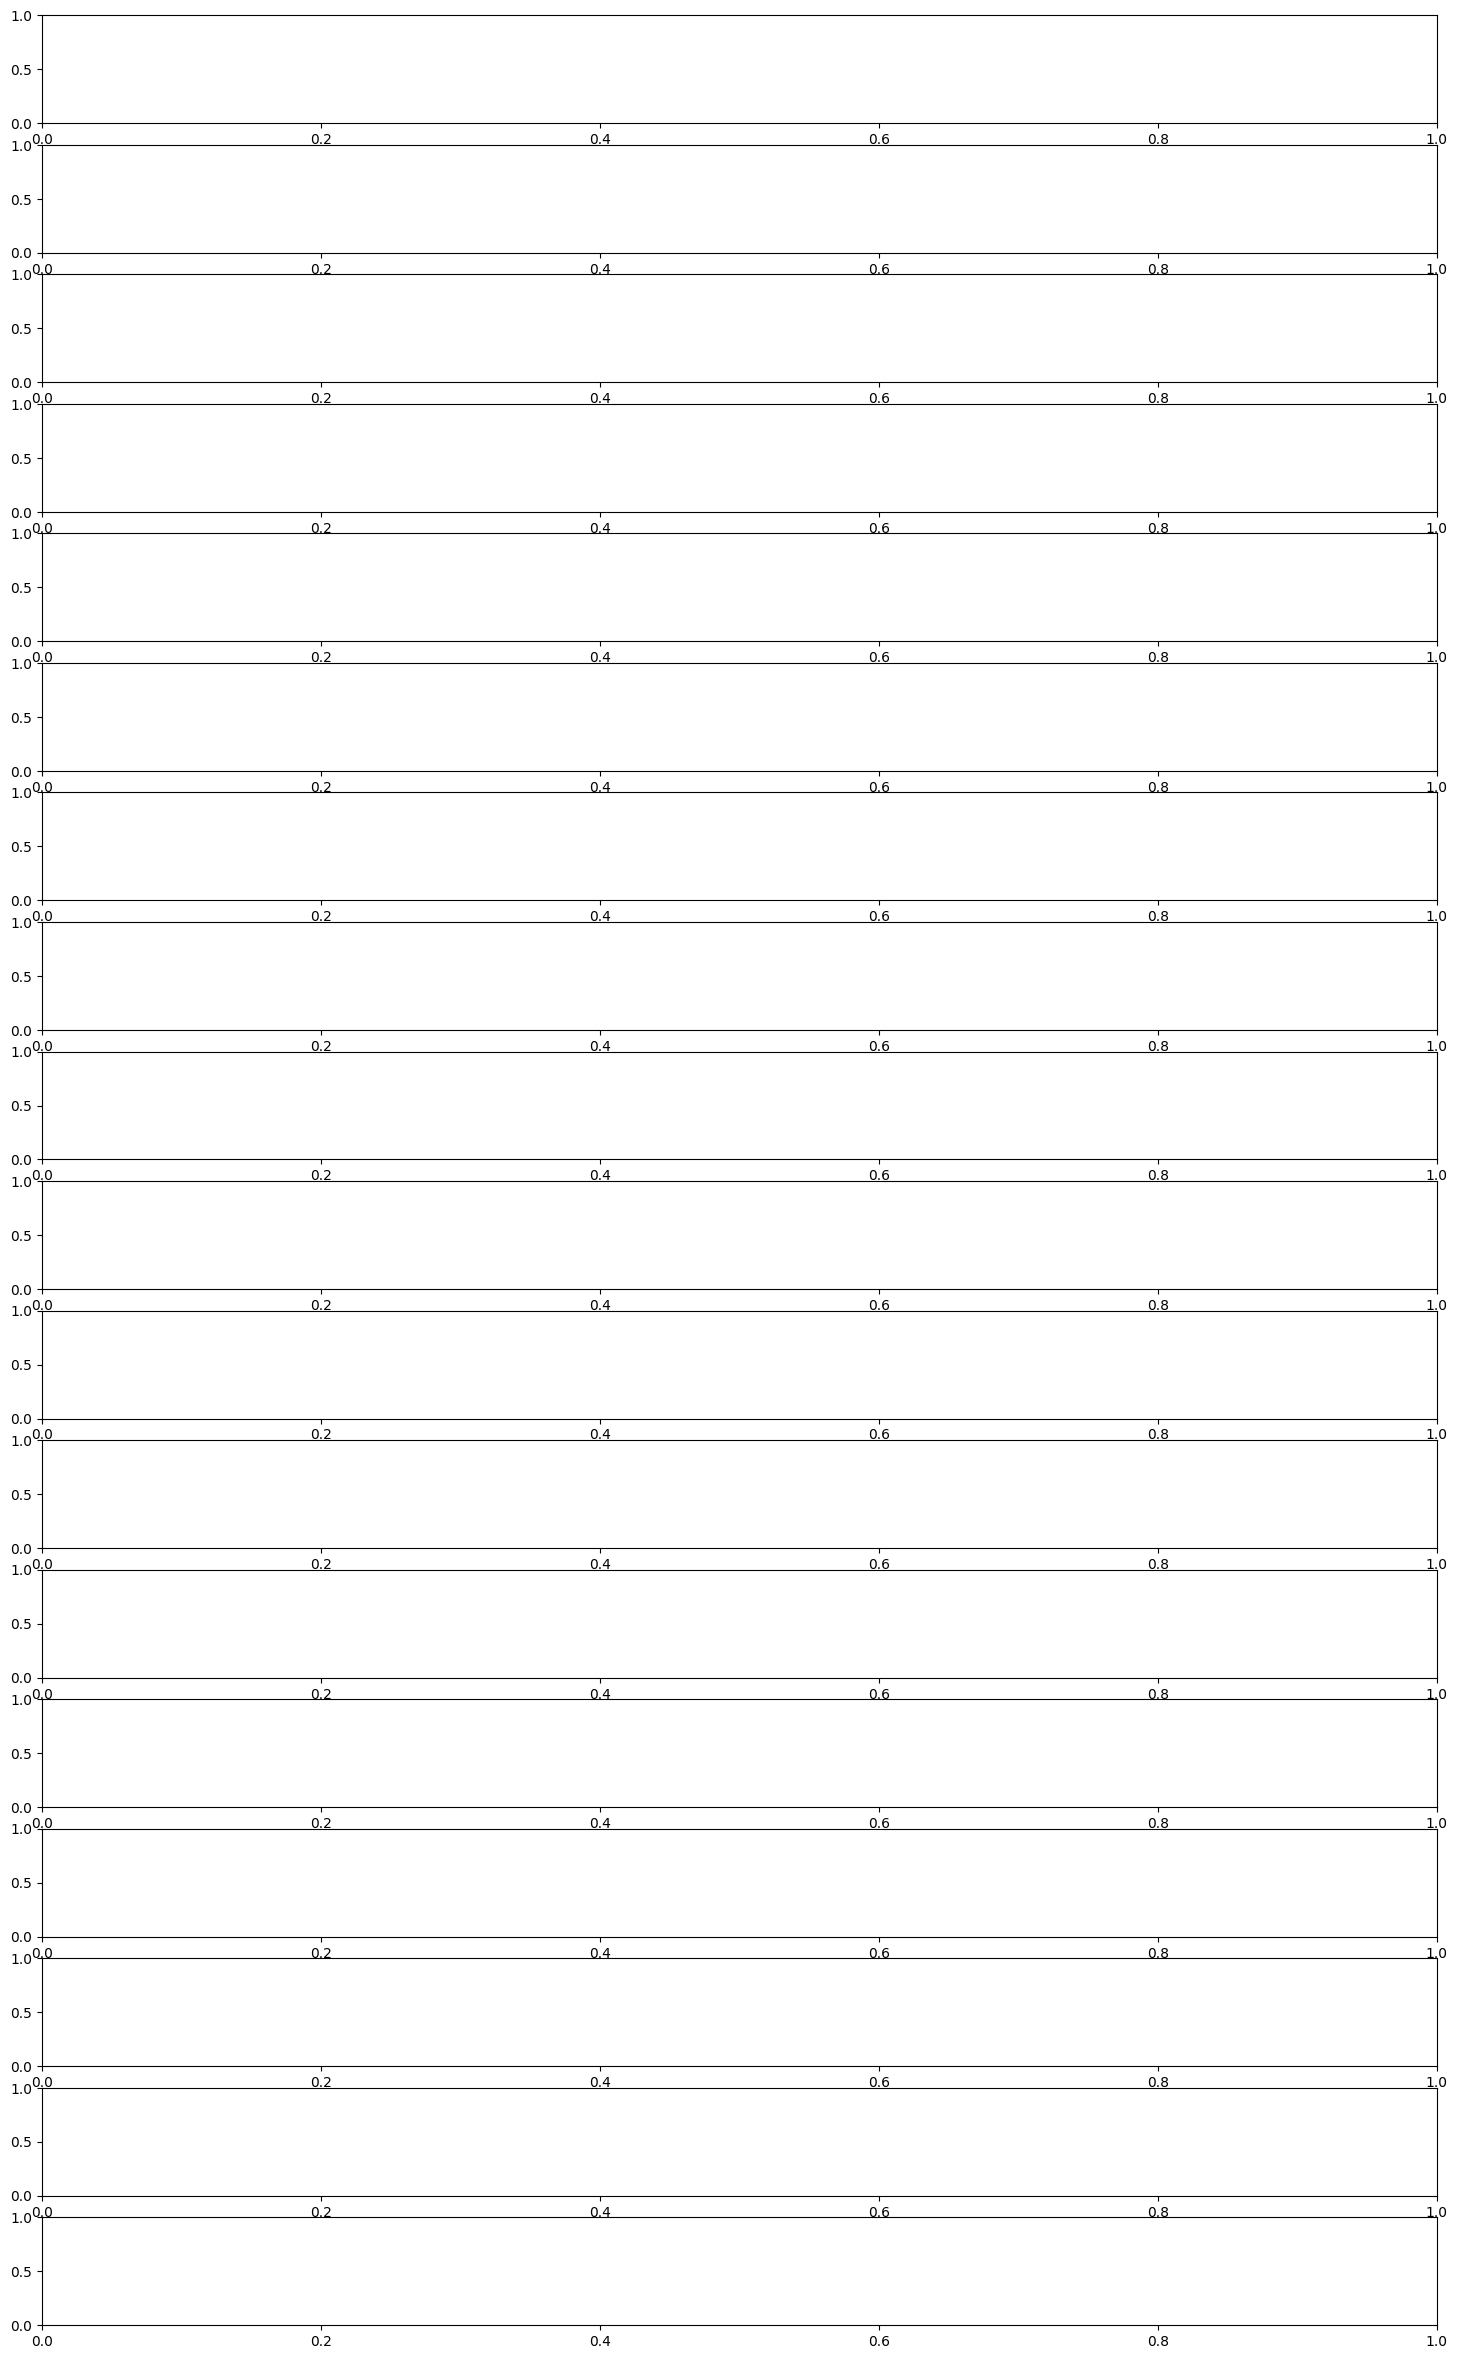

In [4]:
dict_outliers  = {"BB1":["899923","19531","626868","628118"], "WS":["253509"],"MB2":["1651629","1651627","1829818","486527"]}
plot_len = 9*2
cmpt = 0
fig, ax = plt.subplots(plot_len,1, figsize=(18,30))

for type in dict_outliers.keys():
    for id_profil in dict_outliers[type]:
        sorted_points = load_profil(type,id_profil)
        cleaned_points,mask = remove_outliers_from_y(sorted_points.copy(deep=True),30)
        plot_outliers(ax[cmpt],type, id_profil, sorted_points, mask)
        ax[cmpt+1].plot(cleaned_points.x, cleaned_points.y, marker='o')
        cmpt += 2

plt.show()


In [5]:
def shiftYValues(profil):
    xmin = profil[(profil.x>=470)& (profil.x <=570)].x.min()
    print(f"xmin : {xmin} ymin : {profil[profil.x == xmin].y.values[0]}" )
    profil['y'] -= profil.loc[profil['x'] == xmin, 'y'].values[0]
    profil = profil[(profil.x >= -470) & (profil.x <= 470)]
    return profil


def remove_outliers_from_y(points, min_threshold, max_threshold):
    points.loc[(points.y >= max_threshold) | (points.y <= min_threshold), 'y'] = np.nan
    # outlier_mask = points[(points.y >= max_threshold) | (points.y <= min_threshold)] 
    points['y'] = points['y'].ffill()
    points['y'] = points['y'].bfill()

def process_normalization(profil, min, max):
    profil['y'] = (profil.y - min) / (max - min)


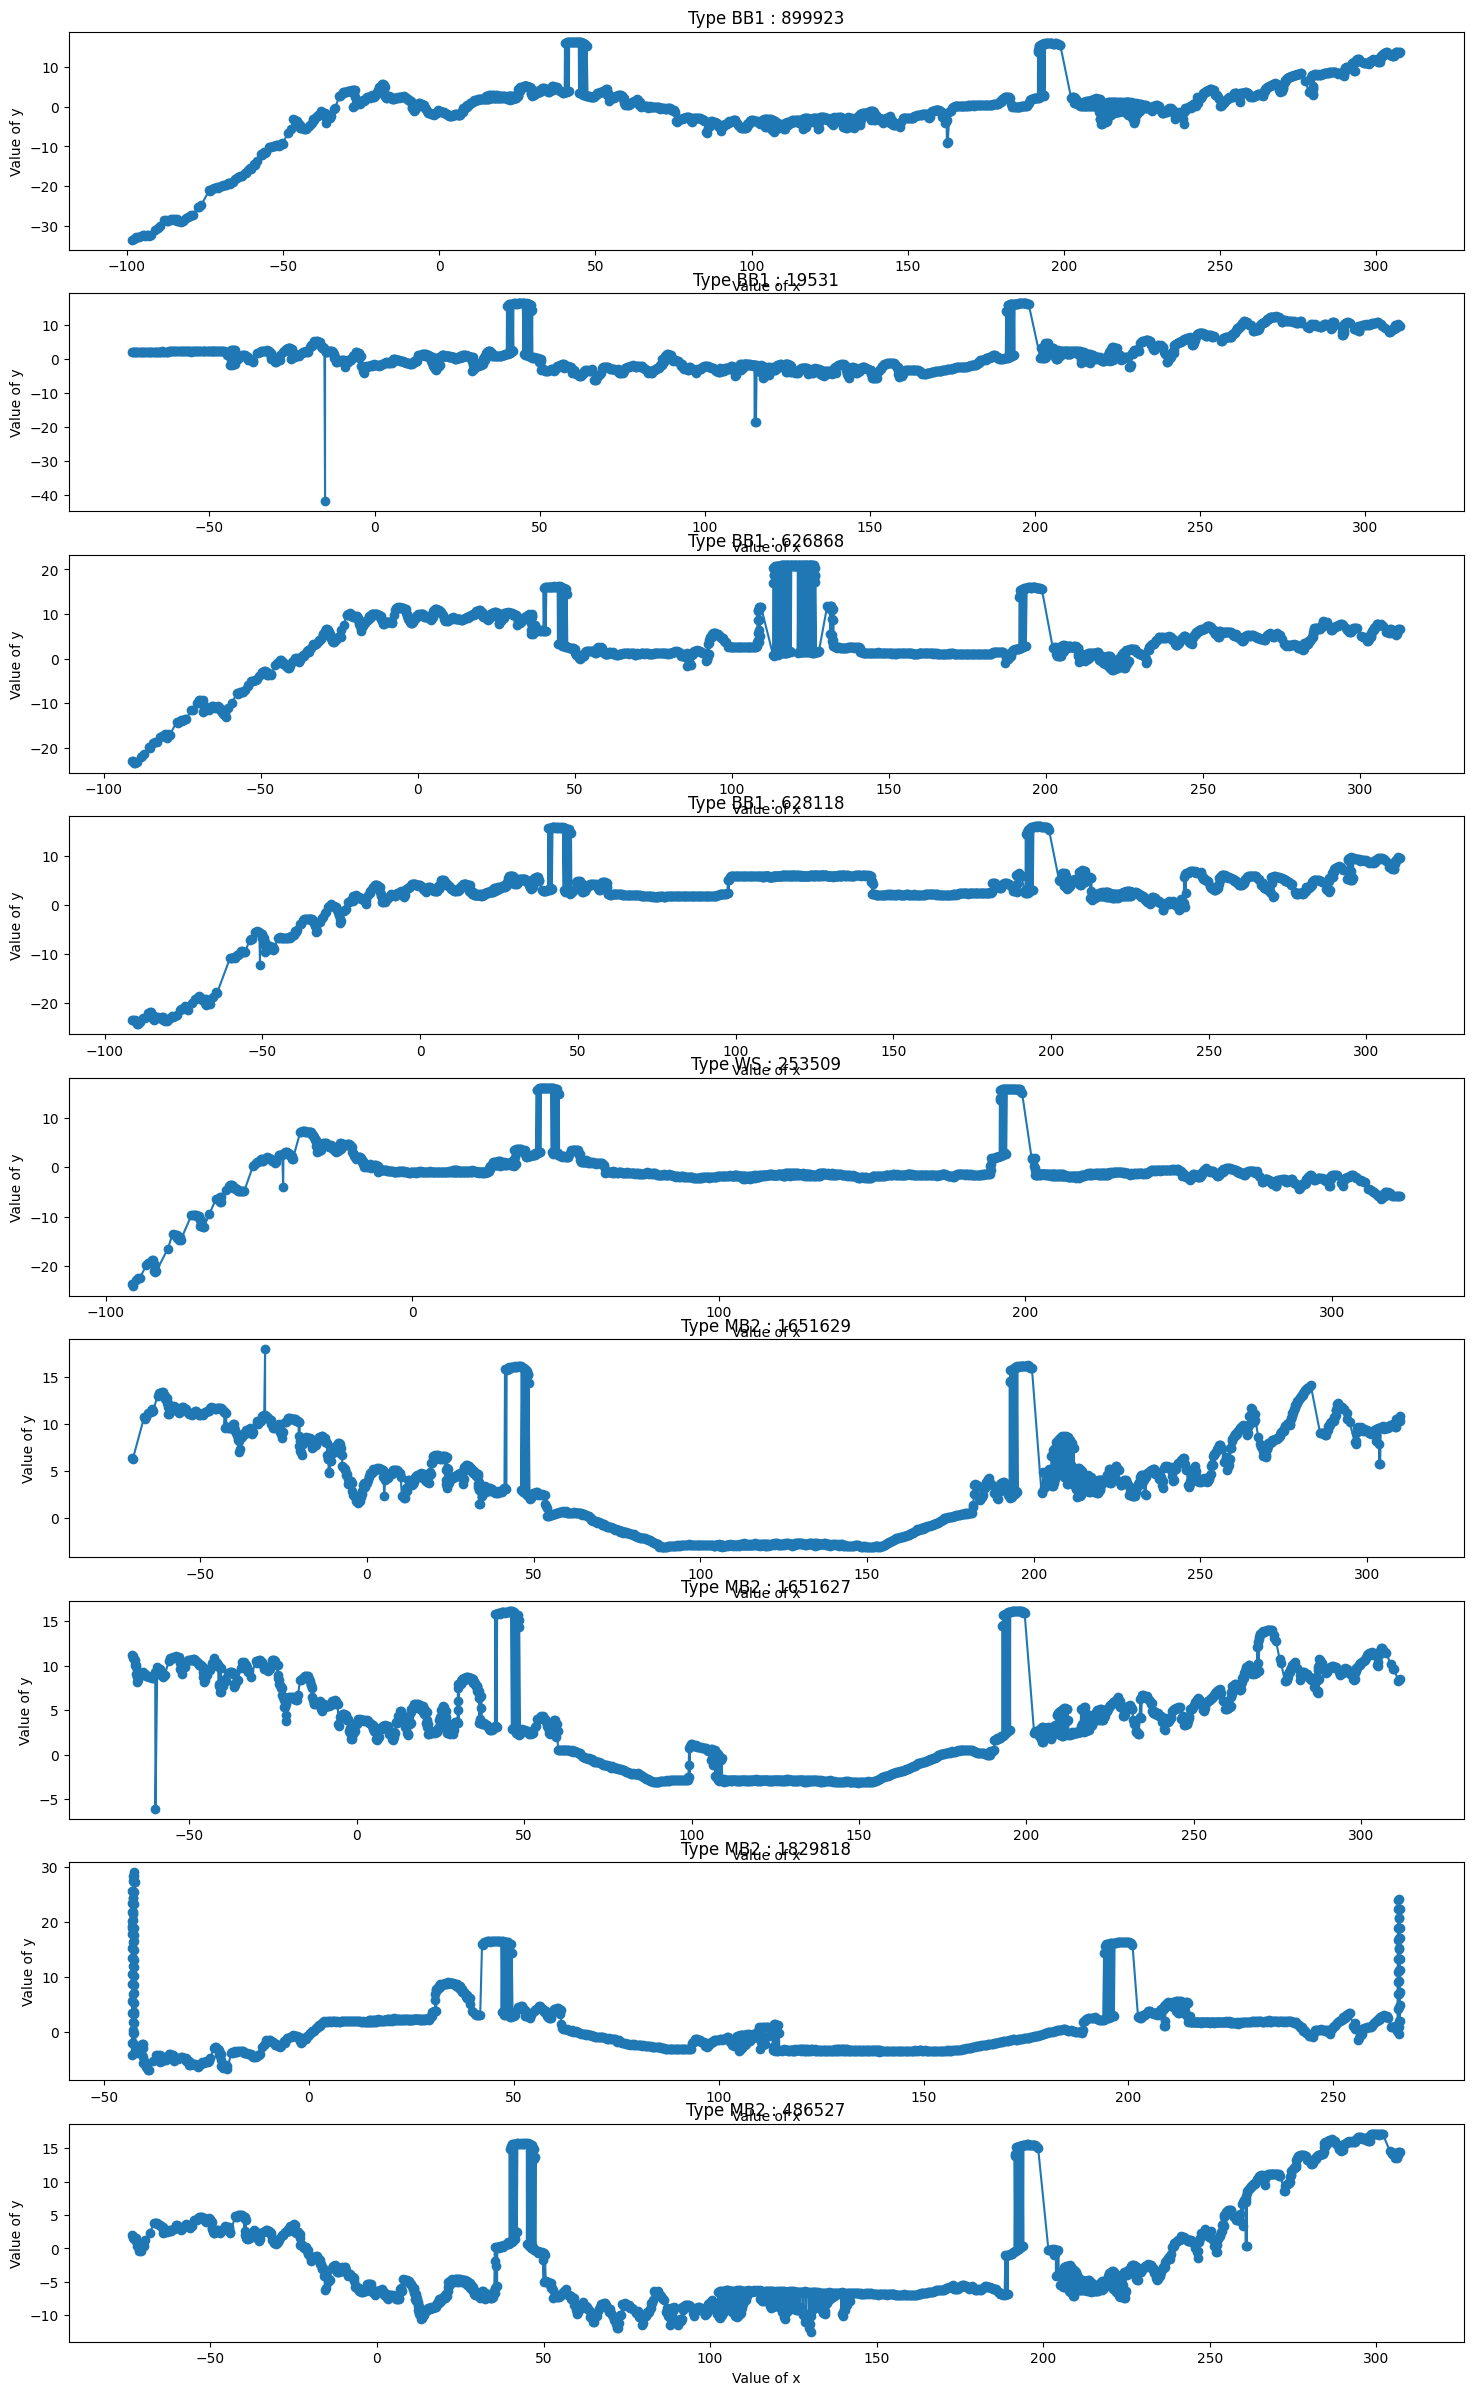

In [13]:
dict_outliers  = {"BB1":["899923","19531","626868","628118"], "WS":["253509"],"MB2":["1651629","1651627","1829818","486527"]}
plot_len = 9
cmpt = 0
fig, ax = plt.subplots(plot_len,1, figsize=(18,30))

for type in dict_outliers.keys():
    for id_profil in dict_outliers[type]:
        profil = load_profil(type,id_profil)
        profil += 1200 
        profil /= 10
        # profil = shiftYValues(profil)
        # remove_outliers_from_y(profil,-110,200)
        # process_normalization(profil, -110,200)
        plot_outliers(ax[cmpt],type, id_profil, profil)
        # ax[cmpt].plot(cleaned_points.x, cleaned_points.y, marker='o')
        cmpt += 1

plt.show()

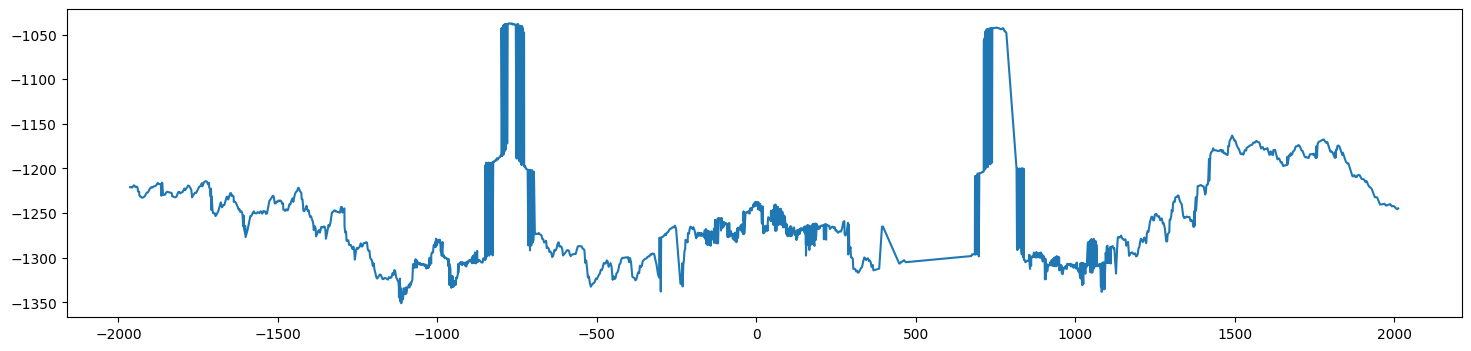

In [ ]:
points = load_profil("WS",1147740)
fig, ax = plt.subplots(figsize=(18,4))
ax.plot(points.x, points.y)

In [ ]:
def getProfilSD(profil):
    #Générer des données aléatoires pour le nuage de points
    num_points = len(profil)
    x_values = profil.x
    y_values = profil.y

    # # Créer le nuage de points
    # plt.scatter(x_values, y_values, c='blue', marker='o', label='Nuage de points')

    # Effectuer la régression linéaire
    coefficients = np.polyfit(x_values, y_values, 1)
    polynomial = np.poly1d(coefficients)

    # Tracer la droite de régression linéaire
    x_regression = np.linspace(min(x_values), max(x_values), num_points)

    residuals = y_values -  polynomial(x_regression)
    return np.std(residuals)

In [ ]:
xmin = points[(points.x>=-470)& (points.x <=-570)]

In [ ]:
points[(points.x>=-570)& (points.x <=-470)]

,x,y


In [ ]:
zone1 = points[(points.x>=-570)& (points.x <=-470)]
zone3 = points[(points.x >= 470) & (points.x <=570)] 
zone3.empty


True

In [ ]:
zone1 = points[(points.x >= -570) & (points.x <= -470)]
zone3 = points[(points.x >= 470) & (points.x <= 570)]

sd_zone1 = getProfilSD(zone1) if not zone1.empty else None
sd_zone3 = getProfilSD(zone3) if not zone3.empty else None

if(sd_zone1 == None):
    xmin = zone3.x.min()
elif(sd_zone3 == None):
    xmin = zone1.x.min()
else : 
    xmin = zone3.x.min() if sd_zone3 < sd_zone1 else zone1.x.min()
xmin

-569.4382